In [ ]:
import re

import pandas as pd
import numpy as np

import nltk

from nltk import word_tokenize, bigrams #토큰화, 바이그램

from nltk.util import ngrams #트라이그램
from nltk import ConditionalFreqDist #동시출현빈도 계수화

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('[a-zA-Z]+')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

from nltk import wordnet
nltk.download('wordnet')
nltk.download('punkt')

import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from gensim.parsing.preprocessing import preprocess_string

import matplotlib.pyplot as plt

from pprint import pprint
import math

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# print(stop_words)

stop_words_plus = 'study group result purpose analysis effect factor test research week time minute hour influence session total pre anova second non hypothesis sub protocol others suggestion min cronbach percentage kim medium decision pilot amos ancova chi sec posttest thing one lee set ten sixty affect etc third forty conclusion data subject participant method year post day spss version discussion percent delphi average ver left right alpha semi choi age researcher month max trial propulsion pretest none keywords marker validity sampling covariance therefore inter pearson'
stop_words_plus = stop_words_plus.split(' ')
print(stop_words_plus)

stop_words = stop_words + stop_words_plus
# print(stop_words)
print(len(stop_words))

['study', 'group', 'result', 'purpose', 'analysis', 'effect', 'factor', 'test', 'research', 'week', 'time', 'minute', 'hour', 'influence', 'session', 'total', 'pre', 'anova', 'second', 'non', 'hypothesis', 'sub', 'protocol', 'others', 'suggestion', 'min', 'cronbach', 'percentage', 'kim', 'medium', 'decision', 'pilot', 'amos', 'ancova', 'chi', 'sec', 'posttest', 'thing', 'one', 'lee', 'set', 'ten', 'sixty', 'affect', 'etc', 'third', 'forty', 'conclusion', 'data', 'subject', 'participant', 'method', 'year', 'post', 'day', 'spss', 'version', 'discussion', 'percent', 'delphi', 'average', 'ver', 'left', 'right', 'alpha', 'semi', 'choi', 'age', 'researcher', 'month', 'max', 'trial', 'propulsion', 'pretest', 'none', 'keywords', 'marker', 'validity', 'sampling', 'covariance', 'therefore', 'inter', 'pearson']
262


In [ ]:
df = pd.read_excel('220328_1993_2021_한국_특수체육학회지(최종).xlsx')

dates = df['권호사항']
date_list = []
for date in dates:
    year = date.find('[')
    date_list.append(date[year+1:year+5])
    
df['발행연도'] = date_list

posts = df.get('영문초록')
years = df.get('발행연도')

df.head()



# nouns2 = []
# for post in posts.values:
#     tokenized_post = tokenizer.tokenize(post.lower())
#     lemmatized_post = [lemmatizer.lemmatize(token) for token in tokenized_post]
#     stopped_post = [token for token in lemmatized_post if token not in stop_words]
#     nouns2.append(stopped_post)

# print(len(nouns2))

Unnamed: 0                                                 제목  \
0           1  장애인체육 지원을 위한 법률 제정의 필요와 방향                    ...   
1           2  재활운동 및 체육의 개념에 대한 이해관계자들의 인식 차이               ...   
2           3  유니버설디자인을 적용한 수영장시설 가이드라인 개발 연구                ...   
3           4  한국과 미국의 특수체육 연구동향 비교분석(2016-2020): APAE와 APAQ를...   
4           5  휠체어 탁구선수 유니폼 개발을 위한 3D 동작 및 체표 변화 분석          ...   

                                                  저자                    권호사항  \
0                                                조재훈  Vol.29   No.4   [2021]   
1  김지태                          ; 정태린            ...  Vol.29   No.4   [2021]   
2  이은석                          ; 이병욱            ...  Vol.29   No.4   [2021]   
3  이현수                          ; 김대경            ...  Vol.29   No.4   [2021]   
4  박광애                          ; 한창수            ...  Vol.29   No.4   [2021]   

                                                 키워드         수록면  \
0  장애인체육; 특수체육; 재활체육; 생활체육; 체육법; 스포츠법률; 장애인법률; Ad...   1-17(17쪽)   
1  재활운동 및 체육; 개념; 의미 및 정의; 역할 및 가치; 이해관계자; Rehabi...  19-29(11쪽)   
2  universal design; swimming pool facilities; di...  31-41(11쪽)   
3  Adapted Physical Activity; Study Trend; APAE; ...  43-52(10쪽)   
4  장애인스포츠; 휠체어탁구; 유니폼 개발; 3D 동작분석; 체표면적; 체표길이; sp...  53-64(12쪽)   

                                                국문초록  \
0  이 연구는 이 연구는 장애인체육 관련 법령의 한계와 장애인체육만의 차별성을 제시하고...   
1  이 연구는 재활운동 및 체육의 개념(의미 및 정의/역할 및 가치)에 대한 이해관계자...   
2  본 연구는 전문가 델파이를 통하여 유니버설디자인(universal design:이하...   
3  본 연구는 한국과 미국 학회지에 게제된 논문을 분석하여 연구동향을 파악하기 위해 국...   
4  본 연구의 목적은 휠체어탁구 선수에 적합한 유니폼 개발을 위해 3D 동작분석에 기반...   

                                                영문초록  발행연도  
0  The purposes of this research were to investig...  2021  
1  The purpose of this study was to investigate d...  2021  
2  This study was conducted with the purpose of p...  2021  
3  The purpose of study was to compare and analyz...  2021  
4  The purpose of this study is to collect basic ...  2021

In [ ]:
from nltk.tag import pos_tag
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
tokens_pos_list = []
for post in posts.values:
  #토큰화
  tokenized = tokenizer.tokenize(post.lower())
  pt = pos_tag(tokenized)
  tokens_pos_list.append(pt)

In [ ]:
len(tokens_pos_list)

960

In [ ]:
tokens_pos_list[:5]

[[('the', 'DT'),
  ('purposes', 'NNS'),
  ('of', 'IN'),
  ('this', 'DT'),
  ('research', 'NN'),
  ('were', 'VBD'),
  ('to', 'TO'),
  ('investigate', 'VB'),
  ('limitations', 'NNS'),
  ('and', 'CC'),
  ('differences', 'NNS'),
  ('of', 'IN'),
  ('legislation', 'NN'),
  ('in', 'IN'),
  ('the', 'DT'),
  ('adapted', 'JJ'),
  ('physical', 'JJ'),
  ('activities', 'NNS'),
  ('and', 'CC'),
  ('also', 'RB'),
  ('this', 'DT'),
  ('study', 'NN'),
  ('presented', 'VBD'),
  ('the', 'DT'),
  ('necessity', 'NN'),
  ('of', 'IN'),
  ('legislating', 'NN'),
  ('and', 'CC'),
  ('its', 'PRP$'),
  ('direction', 'NN'),
  ('for', 'IN'),
  ('the', 'DT'),
  ('supports', 'NNS'),
  ('of', 'IN'),
  ('the', 'DT'),
  ('adapted', 'JJ'),
  ('physical', 'JJ'),
  ('activities', 'NNS'),
  ('presented', 'VBD'),
  ('differences', 'NNS'),
  ('in', 'IN'),
  ('this', 'DT'),
  ('research', 'NN'),
  ('were', 'VBD'),
  ('human', 'JJ'),
  ('rights', 'NNS'),
  ('in', 'IN'),
  ('sport', 'NN'),
  ('characteristics', 'NNS'),
  ('of', 

In [ ]:
def get_wordnet_pos(pos_tag):
    '''
    펜 트리뱅크 품사표기법(pos_tag()의 반환형태)를 받아 WordNetLemmatizer에서 사용하는 품사표기(v, a, n, r)로 변경    '''

    if pos_tag.startswith('V'):
         return 'v'
    if pos_tag.startswith('N'):
            return 'n'
    elif pos_tag.startswith('N'):
         return 'n'
    elif pos_tag.startswith('J'):
        
         return 'a'
    elif pos_tag.startswith('R'):
        return 'r'
    else:
        return 'None'

In [ ]:
#품사형태변환
tokens_pos_list2 = []
for token_list in tokens_pos_list:
    temp_list = []
    for token, pos_tag in token_list:
        tag = get_wordnet_pos(pos_tag)
        if tag == 'n': #반환된 품사가 n인 것들만 담기
            temp_list.append((token, get_wordnet_pos(pos_tag)))
    tokens_pos_list2.append(temp_list)

#기본형복원(표제어추출)
token_final = []
for token_pos in tokens_pos_list2:
    tmp_list = []
    for token, tag in token_pos:
        tmp_list.append(lemmatizer.lemmatize(token, pos=tag))
    token_final.append(tmp_list)

#불용어제거
nouns1 = [] #전체단어
nouns2 = [] #문서별단어
for token in token_final:
    temp = [t for t in token if t not in stop_words and len(t) > 2]
    nouns2.append(temp)
    nouns1.extend(temp)

print(nouns2[:2])
print(nouns1[:5])

[['limitation', 'difference', 'legislation', 'activity', 'necessity', 'legislating', 'direction', 'support', 'activity', 'difference', 'sport', 'characteristic', 'condition', 'treatment', 'activity', 'leader', 'consideration', 'facility', 'program', 'system', 'organization', 'activity', 'necessity', 'legislation', 'change', 'activity', 'enhancement', 'support', 'responsibility', 'clarification', 'activity', 'leader', 'management', 'support', 'facility', 'system', 'level', 'hiring', 'enhancement', 'athlete', 'organization', 'activity', 'direction', 'support', 'law', 'activity', 'name', 'legislation', 'need', 'legislation', 'law', 'name', 'support', 'law', 'promotion', 'act', 'consideration', 'activity', 'criterion', 'activity', 'leader', 'enhancement', 'accessibility', 'support', 'facility', 'employment', 'support', 'system', 'athlete', 'support', 'activity', 'program', 'club', 'base', 'organization', 'need'], ['difference', 'perception', 'stakeholder', 'concept', 'meaning', 'definition

In [ ]:
texts = []
for nouns in nouns2:
    texts.extend(nouns)

counted_tokens = Counter(texts)


counted_tokens_df = pd.DataFrame.from_dict(counted_tokens, orient='index').reset_index()
counted_tokens_df = counted_tokens_df.sort_values(0, ascending=False).reset_index(drop=True)
counted_tokens_df.index = counted_tokens_df.index+1
counted_tokens_df.rename(columns={'index': 'word', 0: 'freq'}, inplace=True)

# counted_tokens_df.to_excel('220329_영문초록_빈도분석5차.xlsx')

counted_tokens_df.head()

word  freq
1  disability  1733
2       sport  1325
3    activity  1076
4   education  1070
5    exercise  1051

In [ ]:
bigram = gensim.models.Phrases(nouns2)
trigram = gensim.models.Phrases(bigram[nouns2])
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

bigram_document = [bigram_mod[doc] for doc in nouns2]
id2word = corpora.Dictionary(bigram_document)
corpus = [id2word.doc2bow(doc) for doc in bigram_document]

In [ ]:
coherence_values = []
for i in range(2, 11):
  ldamodel = gensim.models.ldamodel.LdaModel(corpus, id2word=id2word, num_topics=i)
  coherence_model_lda = CoherenceModel(model = ldamodel, texts=bigram_document, dictionary=id2word, topn=10)
  coherence_lda = coherence_model_lda.get_coherence()
  coherence_values.append(coherence_lda)
  print('n:', i, '\nCoherence Score:', coherence_lda)

n: 2 
Coherence Score: 0.34548600178893496
n: 3 
Coherence Score: 0.35913429918991363
n: 4 
Coherence Score: 0.3197636970005265
n: 5 
Coherence Score: 0.3201780309820875
n: 6 
Coherence Score: 0.34749699900485664
n: 7 
Coherence Score: 0.3282518730827145
n: 8 
Coherence Score: 0.3641618758838101
n: 9 
Coherence Score: 0.3534090221131761
n: 10 
Coherence Score: 0.3549338342128457


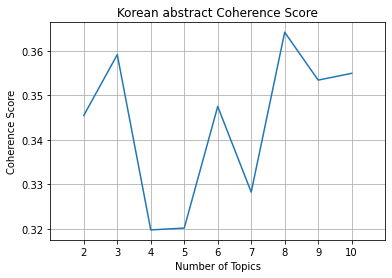

In [ ]:
x = range(2, 11)

plt.plot(x, coherence_values)
plt.title('Korean abstract Coherence Score')
plt.xlim(1, 11)
plt.xticks(x, range(2, 11))
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.grid()
plt.savefig('220330_영문초록_coherence_score_.png')
plt.show()

In [ ]:
#LDA Model 만드는 함수정의
def docLDA(nouns): #nouns=nouns2
  Num_topics = int(input('토픽의 개수를 입력해 주세요.: '))
  Topics_w_num = int(input('출력할 토픽별 단어의 개수를 입력해 주세요.: '))
  save_lda_model = int(input('선택한 토픽 모델을 저장하시겠습니까? \n0 저장 \n1 미저장'))


  Random_state = 100
  Update_every = 1
  Chunksize = 100
  Passes = 10
  Alpha = 'auto'
  Per_word_topics = True


  id2word = corpora.Dictionary(bigram_document)
  corpus = [id2word.doc2bow(doc) for doc in bigram_document]
  model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=Num_topics, random_state=Random_state,
                                          update_every=Update_every, chunksize=Chunksize, passes=Passes, alpha=Alpha)

  pprint(model.print_topics(num_words = Topics_w_num))

  return model, corpus, id2word, Topics_w_num

In [ ]:
nouns2_model, nouns2_corpus, nouns2_id2word, Topics_w_num = docLDA(nouns2)
#nouns2_model.print_topics()

토픽의 개수를 입력해 주세요.: 8
출력할 토픽별 단어의 개수를 입력해 주세요.: 20
선택한 토픽 모델을 저장하시겠습니까? 
0 저장 
1 미저장1
[(0,
  '0.054*"game" + 0.044*"player" + 0.041*"athlete" + 0.033*"motion" + '
  '0.028*"team" + 0.018*"model" + 0.014*"sport" + 0.012*"event" + '
  '0.012*"member" + 0.011*"wheelchair_tennis" + 0.010*"tennis" + '
  '0.010*"stroke" + 0.010*"cord_injury" + 0.009*"displacement" + '
  '0.009*"performance" + 0.009*"strategy" + 0.009*"camp" + 0.008*"type" + '
  '0.008*"ipc" + 0.008*"wheelchair_lawnball"'),
 (1,
  '0.103*"child" + 0.030*"school" + 0.029*"parent" + 0.028*"education" + '
  '0.020*"curriculum" + 0.018*"technique" + 0.017*"condition" + 0.016*"phase" '
  '+ 0.016*"class" + 0.016*"task" + 0.014*"activity" + 0.013*"skill" + '
  '0.012*"goal" + 0.011*"retardation" + 0.011*"type" + '
  '0.011*"student_retardation" + 0.010*"performance" + 0.010*"adolescent" + '
  '0.008*"autism" + 0.008*"play"'),
 (2,
  '0.029*"behavior" + 0.026*"program" + 0.023*"experience" + 0.020*"pattern" + '
  '0.019*"disorder" + 0

In [ ]:
#토픽별 글자만 뽑아내는 함수정의
def getTopic(model):
  topics = []
  for topic in model.print_topics(num_words = Topics_w_num):
      i = 1
      model_words = []
      topic_words = str(topic).split('"')
      for words in topic_words:
          if i%2 == 0:
              model_words.append(words)
          i+=1
      topics.append(model_words)
  return topics

In [ ]:
nouns2_topics = getTopic(nouns2_model)

In [ ]:
nouns2_topics

[['game',
  'player',
  'athlete',
  'motion',
  'team',
  'model',
  'sport',
  'event',
  'member',
  'wheelchair_tennis',
  'tennis',
  'stroke',
  'cord_injury',
  'displacement',
  'performance',
  'strategy',
  'camp',
  'type',
  'ipc',
  'wheelchair_lawnball'],
 ['child',
  'school',
  'parent',
  'education',
  'curriculum',
  'technique',
  'condition',
  'phase',
  'class',
  'task',
  'activity',
  'skill',
  'goal',
  'retardation',
  'type',
  'student_retardation',
  'performance',
  'adolescent',
  'autism',
  'play'],
 ['behavior',
  'program',
  'experience',
  'pattern',
  'disorder',
  'difficulty',
  'competence',
  'case',
  'health',
  'practice',
  'item',
  'process',
  'exercise',
  'inclusion',
  'number',
  'knowledge',
  'observation',
  'category',
  'interest',
  'grade'],
 ['disability',
  'activity',
  'sport',
  'participation',
  'program',
  'person',
  'level',
  'individual',
  'support',
  'people',
  'relationship',
  'survey',
  'exercise',
  'q

In [ ]:
def format_topics_sentences(lda_model=nouns2_model, corpus=corpus, texts=bigram_document):
    sent_topics_df = pd.DataFrame()

    for i, row in enumerate(lda_model[corpus]):
    #     topics_info_by_doc = row[0]
        topics_info_by_doc = row
    #     print(topics_info_by_doc)
    #     topics_info_by_doc = sorted(topics_info_by_doc, key = lambda x: (x[1]), reverse = True)
        topics_info_by_doc = sorted(topics_info_by_doc, key = lambda x: (x[1]), reverse = True)
    #     print(topics_info_by_doc)

        for j, (topic_num, prop_topic) in enumerate(topics_info_by_doc):
    #         print(j, (topic_num, prop_topic))
            if j == 0:
                wp = lda_model.show_topic(topic_num)
    #             print(wp)
                topic_keywords = ', '.join([word for word, prop in wp])
    #             print(topic_keywords)
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num)+1, round(prop_topic, 4), topic_keywords]), ignore_index=True)
            else:
                break

    sent_topics_df.columns = ['Dominant_Topic', 'Perc_contribution', 'Topic_keywords']
    contents = pd.Series(texts)
#     print(contents)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    
    return sent_topics_df

In [ ]:
df_topics_sents_keywords = format_topics_sentences(lda_model=nouns2_model, corpus = nouns2_corpus, texts=bigram_document)

topic_weight = nouns2_model[nouns2_corpus]
df_topic_weight = pd.DataFrame()

for i in range(1, nouns2_model.num_topics+1):
    df_topic_weight['topic{}'.format(i)] = pd.Series()
    
    
df_dominant_topic = df_topics_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Document_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']


for num, topic in enumerate(topic_weight):
#     print(topic)
    for i, r in enumerate(topic):
        df_topic_weight.loc[num, 'topic'+str(i+1)] =r[1]
        
        
df_topic_weight = df_topic_weight.fillna(math.exp(-1000))
        

#
df_topic_last = pd.concat([df, df_dominant_topic, df_topic_weight], axis=1)

df_topic_last.head()

Unnamed: 0                                                 제목  \
0           1  장애인체육 지원을 위한 법률 제정의 필요와 방향                    ...   
1           2  재활운동 및 체육의 개념에 대한 이해관계자들의 인식 차이               ...   
2           3  유니버설디자인을 적용한 수영장시설 가이드라인 개발 연구                ...   
3           4  한국과 미국의 특수체육 연구동향 비교분석(2016-2020): APAE와 APAQ를...   
4           5  휠체어 탁구선수 유니폼 개발을 위한 3D 동작 및 체표 변화 분석          ...   

                                                  저자                    권호사항  \
0                                                조재훈  Vol.29   No.4   [2021]   
1  김지태                          ; 정태린            ...  Vol.29   No.4   [2021]   
2  이은석                          ; 이병욱            ...  Vol.29   No.4   [2021]   
3  이현수                          ; 김대경            ...  Vol.29   No.4   [2021]   
4  박광애                          ; 한창수            ...  Vol.29   No.4   [2021]   

                                                 키워드         수록면  \
0  장애인체육; 특수체육; 재활체육; 생활체육; 체육법; 스포츠법률; 장애인법률; Ad...   1-17(17쪽)   
1  재활운동 및 체육; 개념; 의미 및 정의; 역할 및 가치; 이해관계자; Rehabi...  19-29(11쪽)   
2  universal design; swimming pool facilities; di...  31-41(11쪽)   
3  Adapted Physical Activity; Study Trend; APAE; ...  43-52(10쪽)   
4  장애인스포츠; 휠체어탁구; 유니폼 개발; 3D 동작분석; 체표면적; 체표길이; sp...  53-64(12쪽)   

                                                국문초록  \
0  이 연구는 이 연구는 장애인체육 관련 법령의 한계와 장애인체육만의 차별성을 제시하고...   
1  이 연구는 재활운동 및 체육의 개념(의미 및 정의/역할 및 가치)에 대한 이해관계자...   
2  본 연구는 전문가 델파이를 통하여 유니버설디자인(universal design:이하...   
3  본 연구는 한국과 미국 학회지에 게제된 논문을 분석하여 연구동향을 파악하기 위해 국...   
4  본 연구의 목적은 휠체어탁구 선수에 적합한 유니폼 개발을 위해 3D 동작분석에 기반...   

                                                영문초록  발행연도  Document_No  ...  \
0  The purposes of this research were to investig...  2021            0  ...   
1  The purpose of this study was to investigate d...  2021            1  ...   
2  This study was conducted with the purpose of p...  2021            2  ...   
3  The purpose of study was to compare and analyz...  2021            3  ...   
4  The purpose of this study is to collect basic ...  2021            4  ...   

                                            Keywords  \
0  disability, activity, sport, participation, pr...   
1  disability, activity, sport, participation, pr...   
2  sport, facility, education, people_disability,...   
3  sport, facility, education, people_disability,...   
4  game, player, athlete, motion, team, model, sp...   

                                                Text    topic1    topic2  \
0  [limitation, difference, legislation, activity...  0.038466  0.718336   
1  [difference, perception, stakeholder, concept,...  0.761733  0.076284   
2  [guideline, pool, facility, guideline, meeting...  0.299068  0.089679   
3  [topic, activity, apa, journal, activity, exer...  0.386137  0.040962   
4  [sportswear, design, motion, uniform, wheelcha...  0.523098  0.107423   

     topic3    topic4    topic5  topic6  topic7  topic8  
0  0.224562  0.000000  0.000000     0.0     0.0     0.0  
1  0.108334  0.037274  0.000000     0.0     0.0     0.0  
2  0.022198  0.556454  0.026339     0.0     0.0     0.0  
3  0.539479  0.000000  0.000000     0.0     0.0     0.0  
4  0.345640  0.000000  0.000000     0.0     0.0     0.0  

[5 rows x 22 columns]

In [ ]:
df_topic_last.to_excel('220330_영문초록_논문별_토픽정리.xlsx')

In [ ]:
#시간에 따라 분류
nouns2_year = {}

for i in range(len(posts)):
    if years[i] in nouns2_year:
        nouns2_year[years[i]].append(nouns2[i])
    else:
        nouns2_year[years[i]] = []
        nouns2_year[years[i]].append(nouns2[i])
        
nouns2_year = sorted(nouns2_year.items())        

print(nouns2_year)

[('1993', [['variable', 'parent', 'participation', 'process', 'child', 'education', 'program', 'instrument', 'satisfaction', 'level', 'knowledge', 'teacher', 'parent', 'communication', 'school', 'personnel', 'school', 'service', 'child', 'integration', 'child', 'education', 'construct', 'instrument', 'promax', 'reliability', 'question', 'deck', 'imputation', 'miling', 'survey', 'techique', 'parent', 'board', 'education', 'state', 'perception', 'level', 'child', 'activity', 'sport', 'club', 'sport', 'club', 'satisfaction', 'level', 'significance', 'parent', 'parent', 'level', 'income', 'posse', 'level', 'perception', 'child', 'activity', 'tukey', 'condition', 'parent', 'child', 'satisfaction', 'level', 'activity', 'sensory', 'child'], ['role', 'paralympic', 'committee', 'ipc', 'history', 'sport', 'handicapped', 'ludwig', 'gutmann', 'olympic', 'game', 'mid', 'centry', 'sport', 'game', 'handicapped', 'quality', 'quantity', 'philosophy', 'sport', 'game', 'organization', 'game', 'decade', '

In [ ]:
#연도별 논문개수
nouns2_years = []
years_length = []

for i in range(len(nouns2_year)):
    nouns2_years.append(nouns2_year[i][1])
    years_length.append(len(nouns2_year[i][1]))

print(nouns2_years)
print(years_length)

[[['variable', 'parent', 'participation', 'process', 'child', 'education', 'program', 'instrument', 'satisfaction', 'level', 'knowledge', 'teacher', 'parent', 'communication', 'school', 'personnel', 'school', 'service', 'child', 'integration', 'child', 'education', 'construct', 'instrument', 'promax', 'reliability', 'question', 'deck', 'imputation', 'miling', 'survey', 'techique', 'parent', 'board', 'education', 'state', 'perception', 'level', 'child', 'activity', 'sport', 'club', 'sport', 'club', 'satisfaction', 'level', 'significance', 'parent', 'parent', 'level', 'income', 'posse', 'level', 'perception', 'child', 'activity', 'tukey', 'condition', 'parent', 'child', 'satisfaction', 'level', 'activity', 'sensory', 'child'], ['role', 'paralympic', 'committee', 'ipc', 'history', 'sport', 'handicapped', 'ludwig', 'gutmann', 'olympic', 'game', 'mid', 'centry', 'sport', 'game', 'handicapped', 'quality', 'quantity', 'philosophy', 'sport', 'game', 'organization', 'game', 'decade', 'event', '

In [ ]:
#연도별 명사들이 있는 데이터 하나로 통합
merged_years = []
for texts in nouns2_years:
    for text in texts:
        merged_years = merged_years + [text]
        
print(merged_years)

[['variable', 'parent', 'participation', 'process', 'child', 'education', 'program', 'instrument', 'satisfaction', 'level', 'knowledge', 'teacher', 'parent', 'communication', 'school', 'personnel', 'school', 'service', 'child', 'integration', 'child', 'education', 'construct', 'instrument', 'promax', 'reliability', 'question', 'deck', 'imputation', 'miling', 'survey', 'techique', 'parent', 'board', 'education', 'state', 'perception', 'level', 'child', 'activity', 'sport', 'club', 'sport', 'club', 'satisfaction', 'level', 'significance', 'parent', 'parent', 'level', 'income', 'posse', 'level', 'perception', 'child', 'activity', 'tukey', 'condition', 'parent', 'child', 'satisfaction', 'level', 'activity', 'sensory', 'child'], ['role', 'paralympic', 'committee', 'ipc', 'history', 'sport', 'handicapped', 'ludwig', 'gutmann', 'olympic', 'game', 'mid', 'centry', 'sport', 'game', 'handicapped', 'quality', 'quantity', 'philosophy', 'sport', 'game', 'organization', 'game', 'decade', 'event', 's

In [ ]:
#날짜별로 합쳐진 문서마다 토픽들의 크기 계산
nouns2_topic_size=[]
index=0

for post_len in years_length: #연도별 논문개수 리스트에서 추출[4, 1, 1, ,,,,,]
    topic_size=[]
    doc=[]
    print(post_len) #4, 1, 1, ,,,,
    print('----------- 하위---------')
    
    for i in range(post_len): #i = 4, 1, 1, ,,,,,
        doc+=merged_years[index]
        index+=1
        
    print(doc, '\n')
    
    for model in nouns2_topics: #[['운동', '프로그램', '신체_활동',,,,,,]]
        count=0
        for noun in doc:
            if noun in model:
                count+=1
        topic_size.append(count)
    nouns2_topic_size.append(topic_size)
    
print(nouns2_topic_size)

9
----------- 하위---------
['variable', 'parent', 'participation', 'process', 'child', 'education', 'program', 'instrument', 'satisfaction', 'level', 'knowledge', 'teacher', 'parent', 'communication', 'school', 'personnel', 'school', 'service', 'child', 'integration', 'child', 'education', 'construct', 'instrument', 'promax', 'reliability', 'question', 'deck', 'imputation', 'miling', 'survey', 'techique', 'parent', 'board', 'education', 'state', 'perception', 'level', 'child', 'activity', 'sport', 'club', 'sport', 'club', 'satisfaction', 'level', 'significance', 'parent', 'parent', 'level', 'income', 'posse', 'level', 'perception', 'child', 'activity', 'tukey', 'condition', 'parent', 'child', 'satisfaction', 'level', 'activity', 'sensory', 'child', 'role', 'paralympic', 'committee', 'ipc', 'history', 'sport', 'handicapped', 'ludwig', 'gutmann', 'olympic', 'game', 'mid', 'centry', 'sport', 'game', 'handicapped', 'quality', 'quantity', 'philosophy', 'sport', 'game', 'organization', 'game'

In [ ]:
nouns2_topic_array = np.array(nouns2_topic_size)
nouns2_topic_array

array([[ 42,  43,  17,  57,  28,  37,  56,  91],
       [ 21,  48,  41,  79,  50,  31,  77, 104],
       [ 33,  65,  59,  88,  89,  24,  90, 118],
       [ 46,  63,  60, 107,  61,  64,  72,  80],
       [ 45,  75,  79, 109,  63,  26,  86,  91],
       [ 19,  59,  41,  82,  36,  32, 106,  93],
       [ 92, 130,  72, 169, 102, 137, 192, 163],
       [ 47, 221,  84, 240,  83, 126, 234, 189],
       [ 46, 128,  71, 180, 102,  65, 169, 171],
       [ 42,  96,  52, 161,  79,  58, 157, 133],
       [113, 271, 160, 358, 213, 143, 399, 416],
       [ 55, 189, 143, 289, 182, 111, 278, 213],
       [111, 254, 107, 352, 129, 184, 427, 278],
       [ 87,  96,  51, 187, 110,  71, 118, 132],
       [ 91, 230, 136, 237, 103, 118, 272, 236],
       [125, 248, 169, 431, 220, 150, 369, 334],
       [207, 221, 272, 617, 297, 211, 349, 402],
       [142, 260, 204, 556, 279, 162, 503, 445],
       [149, 269, 148, 523, 195, 247, 545, 359],
       [140, 191, 199, 483, 188, 138, 364, 270],
       [124, 160, 12

In [ ]:
nouns2_topic_df = pd.DataFrame(nouns2_topic_array, 
                              index = sorted(list(set(years))),
                              columns = ['topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6',
                                         'topic7', 'topic8'])
nouns2_topic_df

topic1  topic2  topic3  topic4  topic5  topic6  topic7  topic8
1993      42      43      17      57      28      37      56      91
1994      21      48      41      79      50      31      77     104
1995      33      65      59      88      89      24      90     118
1996      46      63      60     107      61      64      72      80
1997      45      75      79     109      63      26      86      91
1998      19      59      41      82      36      32     106      93
1999      92     130      72     169     102     137     192     163
2000      47     221      84     240      83     126     234     189
2001      46     128      71     180     102      65     169     171
2002      42      96      52     161      79      58     157     133
2003     113     271     160     358     213     143     399     416
2004      55     189     143     289     182     111     278     213
2005     111     254     107     352     129     184     427     278
2006      87      96      51     187     110      71     118     132
2007      91     230     136     237     103     118     272     236
2008     125     248     169     431     220     150     369     334
2009     207     221     272     617     297     211     349     402
2010     142     260     204     556     279     162     503     445
2011     149     269     148     523     195     247     545     359
2012     140     191     199     483     188     138     364     270
2013     124     160     126     379     122     104     242     159
2014     153     248     179     499     170     206     383     333
2015     177     206     171     433     185     158     335     302
2016     177     179     180     602     243     235     347     328
2017     209     214     233     531     129     268     401     278
2018     144     231     173     518     184     221     425     290
2019     220     207     229     532     149     255     374     243
2020     168     230     338     673     297     258     389     300
2021     251     328     487     975     346     394     580     344

In [ ]:
nouns2_topic_df.to_excel('220330_영문초록_연도-토픽_빈도_matrix.xlsx')

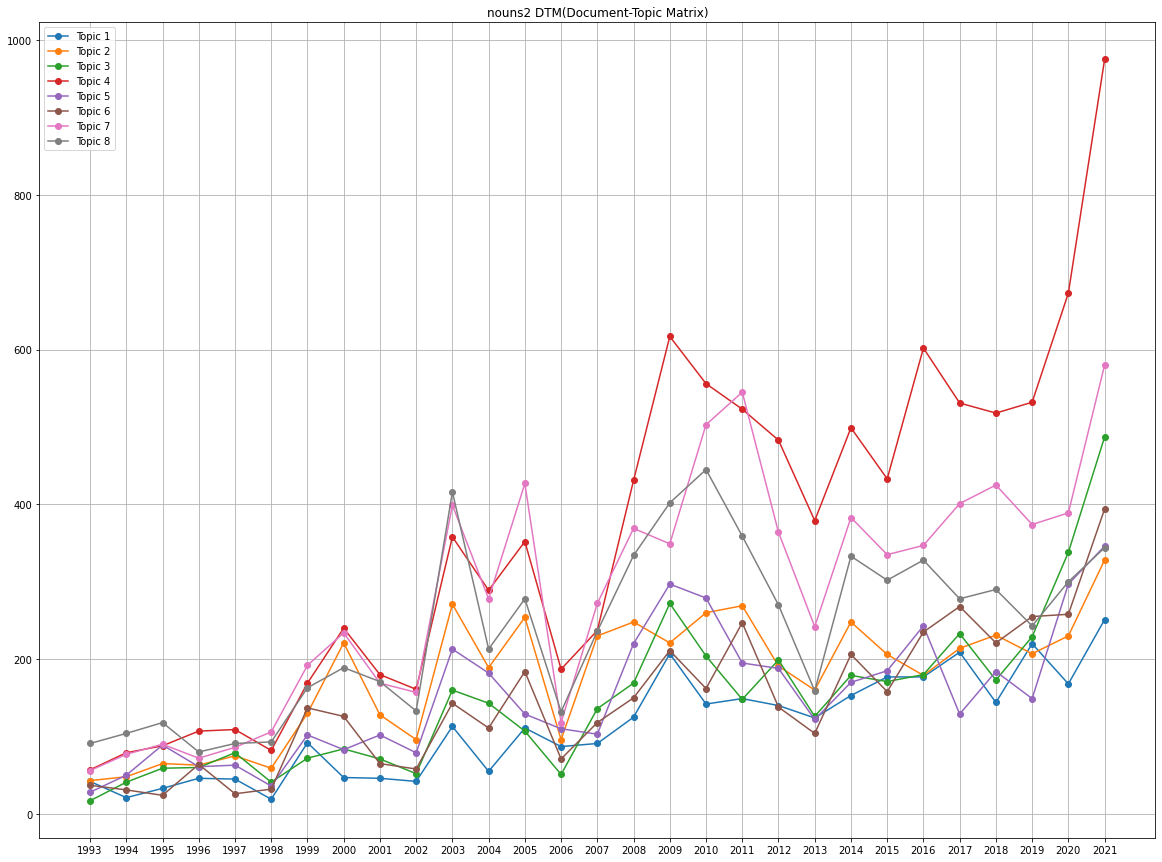

In [ ]:
nouns2_x = [] #시간흐름

nouns2_topic_1 = nouns2_topic_array[:,0]
nouns2_topic_2 = nouns2_topic_array[:,1]
nouns2_topic_3 = nouns2_topic_array[:,2]
nouns2_topic_4 = nouns2_topic_array[:,3]
nouns2_topic_5 = nouns2_topic_array[:,4]
nouns2_topic_6 = nouns2_topic_array[:,5]
nouns2_topic_7 = nouns2_topic_array[:,6]
nouns2_topic_8 = nouns2_topic_array[:,7]
# nouns2_topic_9 = nouns2_topic_array[:,8]
#nouns2_topic_10 = nouns2_topic_array[:,9]
#nouns2_topic_11 = nouns2_topic_array[:,10]
#nouns2_topic_12 = nouns2_topic_array[:,11]
#nouns2_topic_13 = nouns2_topic_array[:,12]
#nouns2_topic_14 = nouns2_topic_array[:,13]
#nouns2_topic_15 = nouns2_topic_array[:,14]
#nouns2_topic_16 = nouns2_topic_array[:,15]
#nouns2_topic_17 = nouns2_topic_array[:,16]

nouns2_unique_years = sorted(list(set(years)))

nouns2_plt_data = []
for unique_year in nouns2_unique_years:
    times = str(unique_year)
    nouns2_x.append(times)
    
plt.rcParams['figure.figsize'] = (20, 15)
plt.title('nouns2 DTM(Document-Topic Matrix)')
plt.plot(nouns2_x, nouns2_topic_1, 'o-', label='Topic 1')
plt.plot(nouns2_x, nouns2_topic_2, 'o-', label='Topic 2')
plt.plot(nouns2_x, nouns2_topic_3, 'o-', label='Topic 3')
plt.plot(nouns2_x, nouns2_topic_4, 'o-', label='Topic 4')
plt.plot(nouns2_x, nouns2_topic_5, 'o-', label='Topic 5')
plt.plot(nouns2_x, nouns2_topic_6, 'o-', label='Topic 6')
plt.plot(nouns2_x, nouns2_topic_7, 'o-', label='Topic 7')
plt.plot(nouns2_x, nouns2_topic_8, 'o-', label='Topic 8')
# plt.plot(nouns2_x, nouns2_topic_9, 'o-', label='Topic 9')
#plt.plot(nouns2_x, nouns2_topic_10, 'o-', label='Topic 10')
#plt.plot(nouns2_x, nouns2_topic_11, 'o-', label='Topic 11')
#plt.plot(nouns2_x, nouns2_topic_12, 'o-', label='Topic 12')
#plt.plot(nouns2_x, nouns2_topic_13, 'o-', label='Topic 13')
#plt.plot(nouns2_x, nouns2_topic_14, 'o-', label='Topic 14')
#plt.plot(nouns2_x, nouns2_topic_15, 'o-', label='Topic 15')
#plt.plot(nouns2_x, nouns2_topic_16, 'o-', label='Topic 16')
#plt.plot(nouns2_x, nouns2_topic_17, 'o-', label='Topic 17')

plt.grid()
plt.legend()

plt.savefig('220330_영문초록_토픽전체_시계열.png')
plt.show()

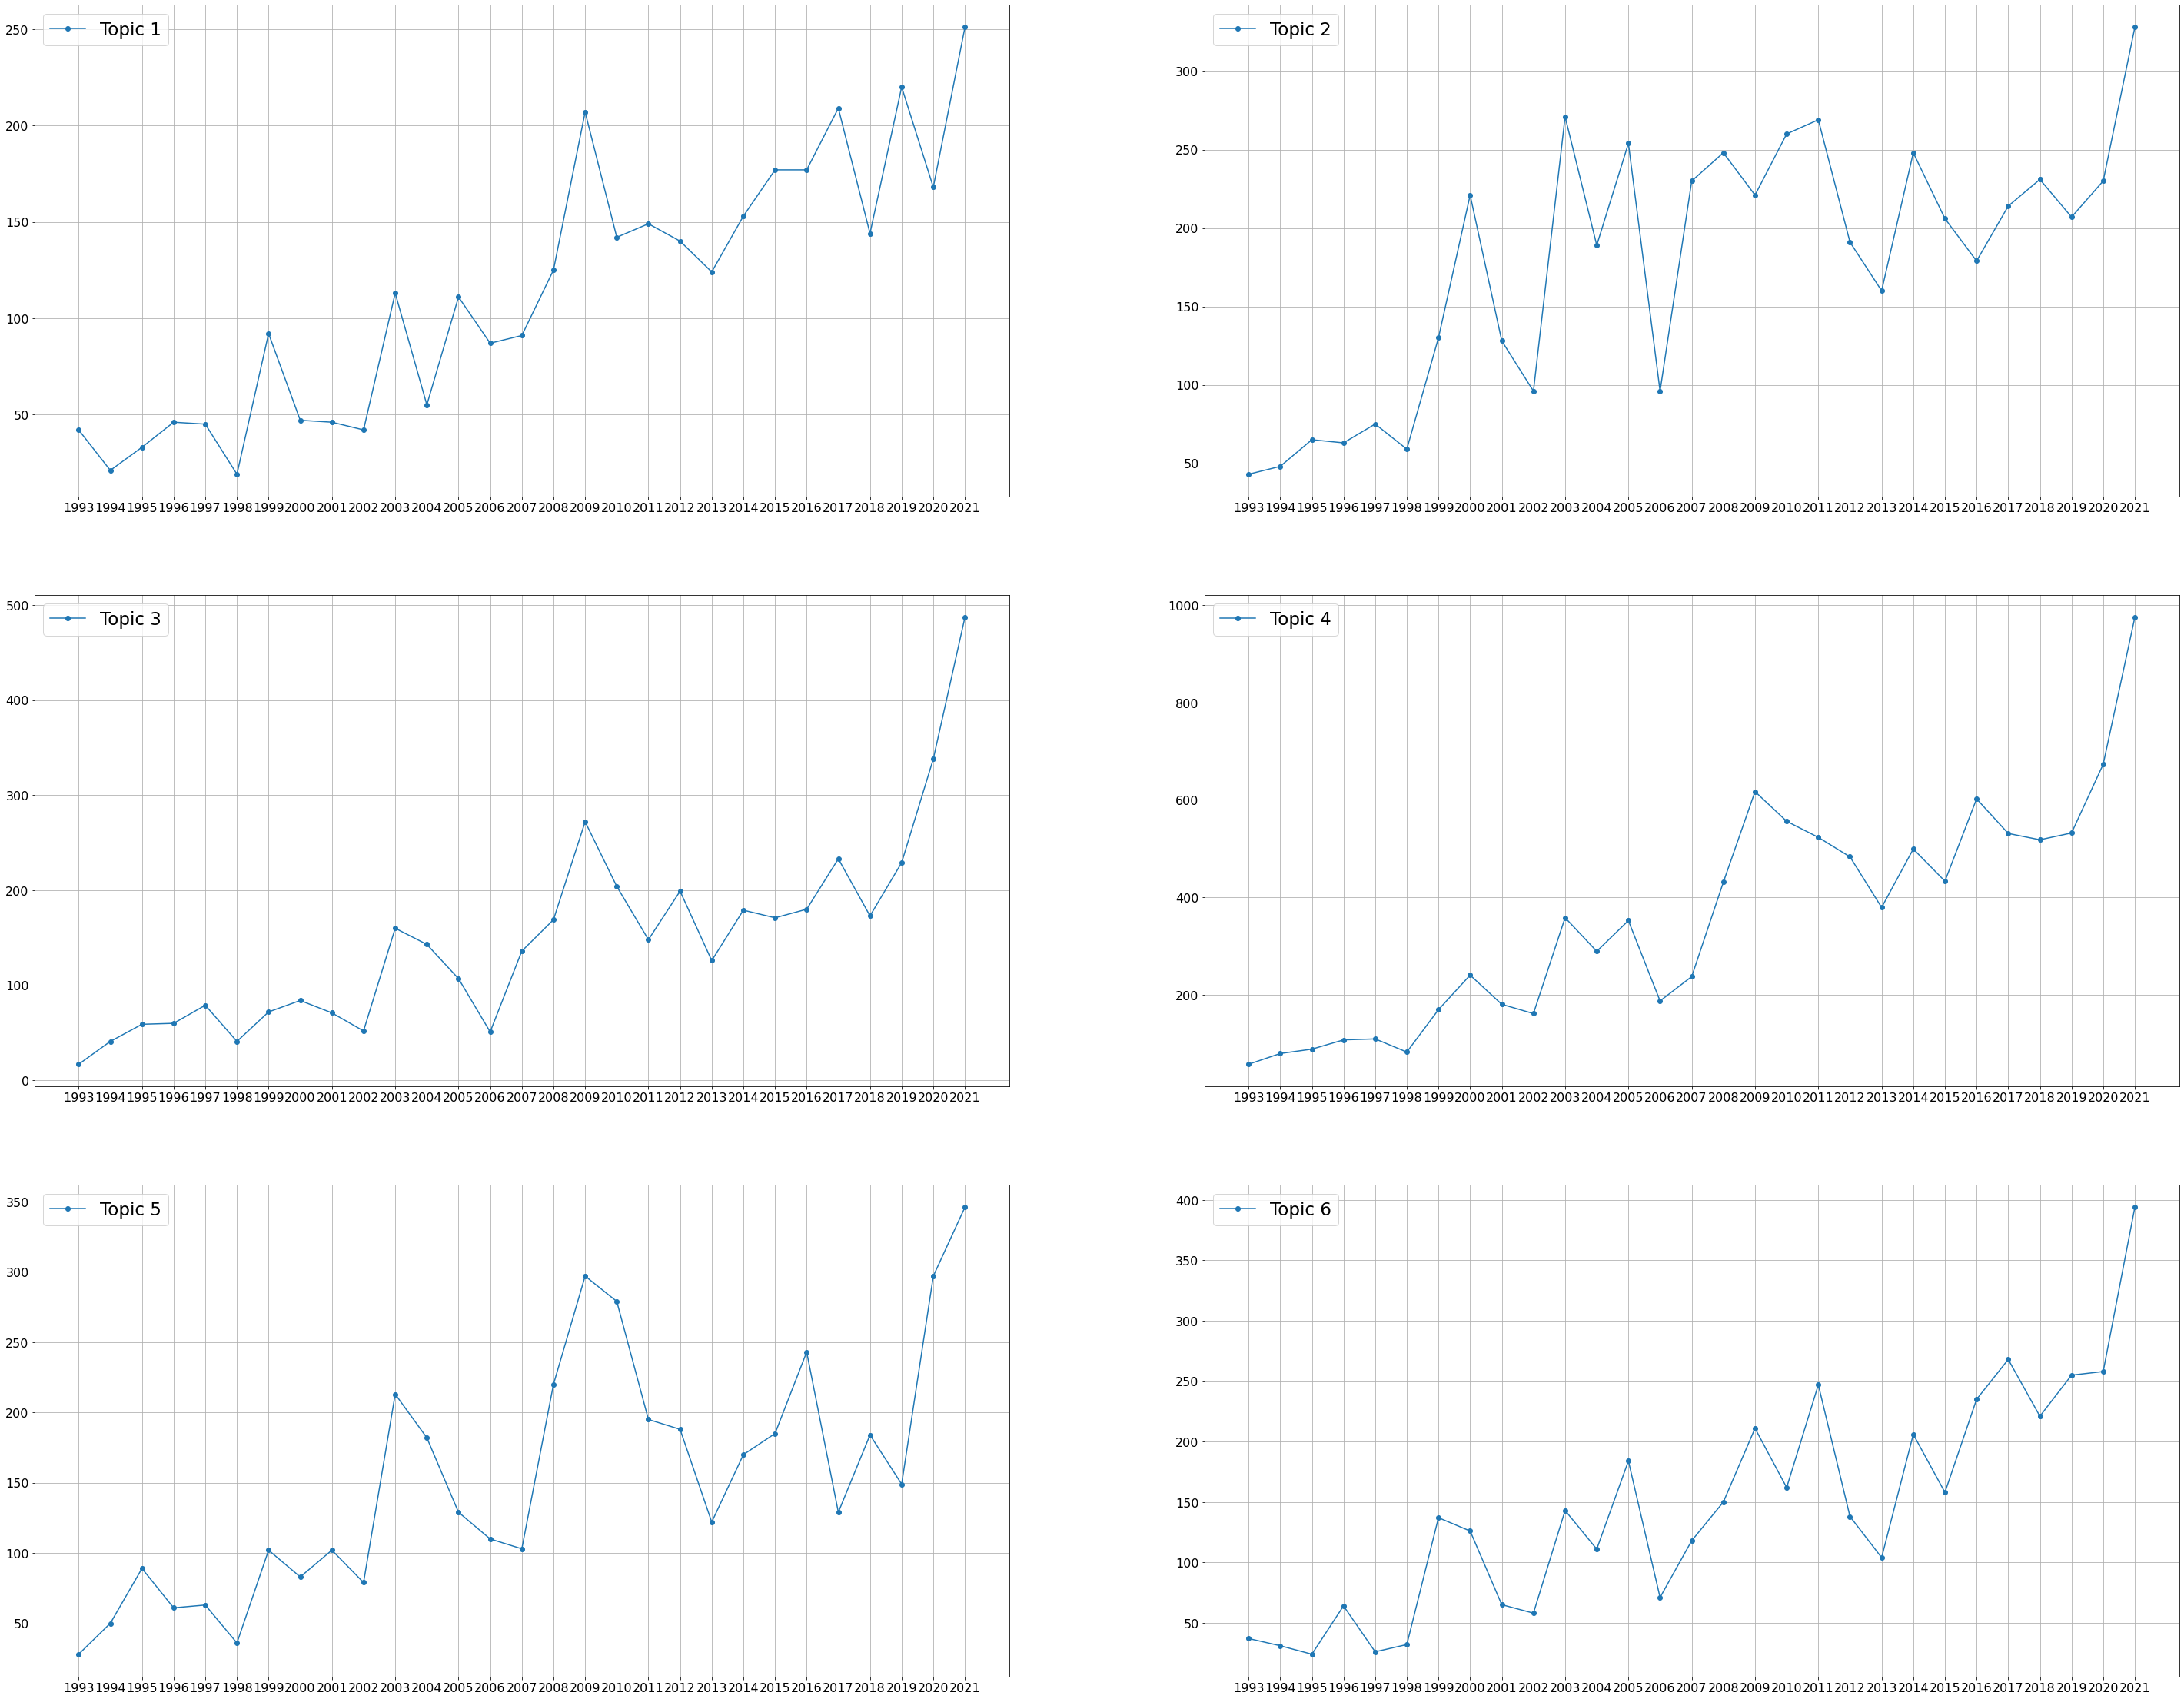

In [ ]:
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

plt.figure(figsize=(50, 40))

plt.subplot(321)
plt.plot(nouns2_x, nouns2_topic_1, 'o-', label='Topic 1')
plt.grid()
plt.legend(fontsize=23)

plt.subplot(322)
plt.plot(nouns2_x, nouns2_topic_2, 'o-', label='Topic 2')
plt.grid()
plt.legend(fontsize=23)

plt.subplot(323)
plt.plot(nouns2_x, nouns2_topic_3, 'o-', label='Topic 3')
plt.grid()
plt.legend(fontsize=23)

plt.subplot(324)
plt.plot(nouns2_x, nouns2_topic_4, 'o-', label='Topic 4')
plt.grid()
plt.legend(fontsize=23)

plt.subplot(325)
plt.plot(nouns2_x, nouns2_topic_5, 'o-', label='Topic 5')
plt.grid()
plt.legend(fontsize=23)

plt.subplot(326)
plt.plot(nouns2_x, nouns2_topic_6, 'o-', label='Topic 6')
plt.grid()
plt.legend(fontsize=23)

plt.savefig('220330_영문초록_토픽별_시계열_1-6')

plt.show()

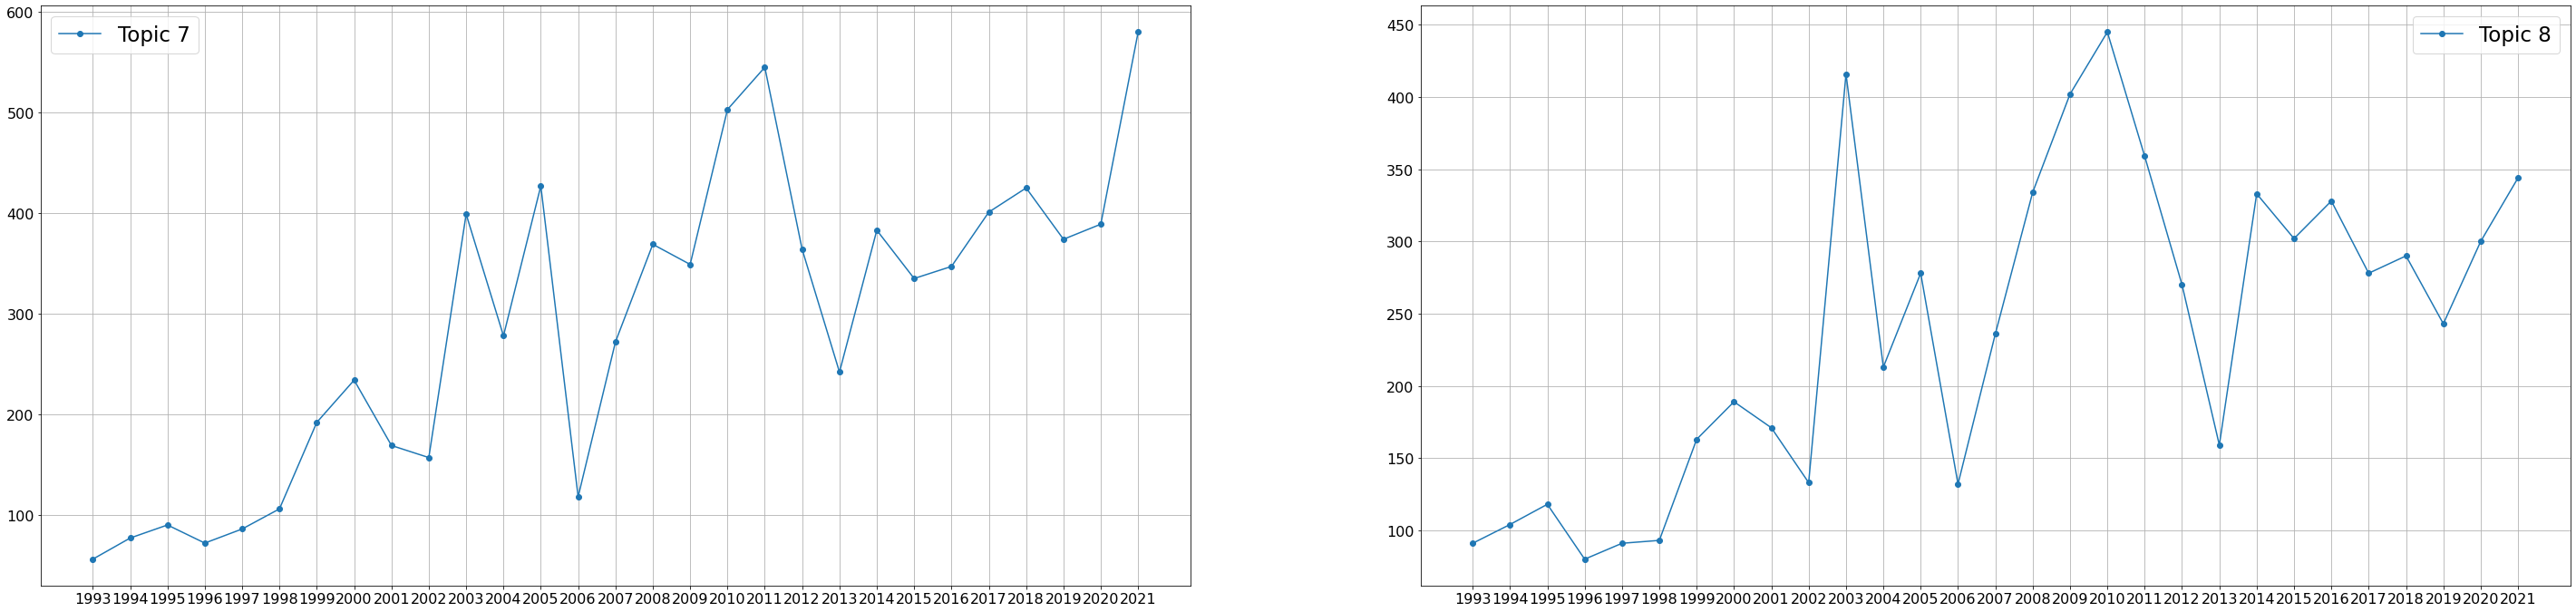

In [ ]:
plt.figure(figsize=(50, 40))

plt.subplot(321)
plt.plot(nouns2_x, nouns2_topic_7, 'o-', label='Topic 7')
plt.grid()
plt.legend(fontsize=23)

plt.subplot(322)
plt.plot(nouns2_x, nouns2_topic_8, 'o-', label='Topic 8')
plt.grid()
plt.legend(fontsize=23)

#plt.subplot(323)
#plt.plot(nouns2_x, nouns2_topic_9, 'o-', label='Topic 9')
#plt.grid()
#plt.legend()

#plt.subplot(324)
#plt.plot(nouns2_x, nouns2_topic_10, 'o-', label='Topic 10')
#plt.grid()
#plt.legend()

#plt.subplot(325)
#plt.plot(nouns2_x, nouns2_topic_11, 'o-', label='Topic 11')
#plt.grid()
#plt.legend()

#plt.subplot(326)
#plt.plot(nouns2_x, nouns2_topic_12, 'o-', label='Topic 12')
#plt.grid()
#plt.legend()

plt.savefig('220330_영문초록_토픽별_시계열_7-8.png')

plt.show()

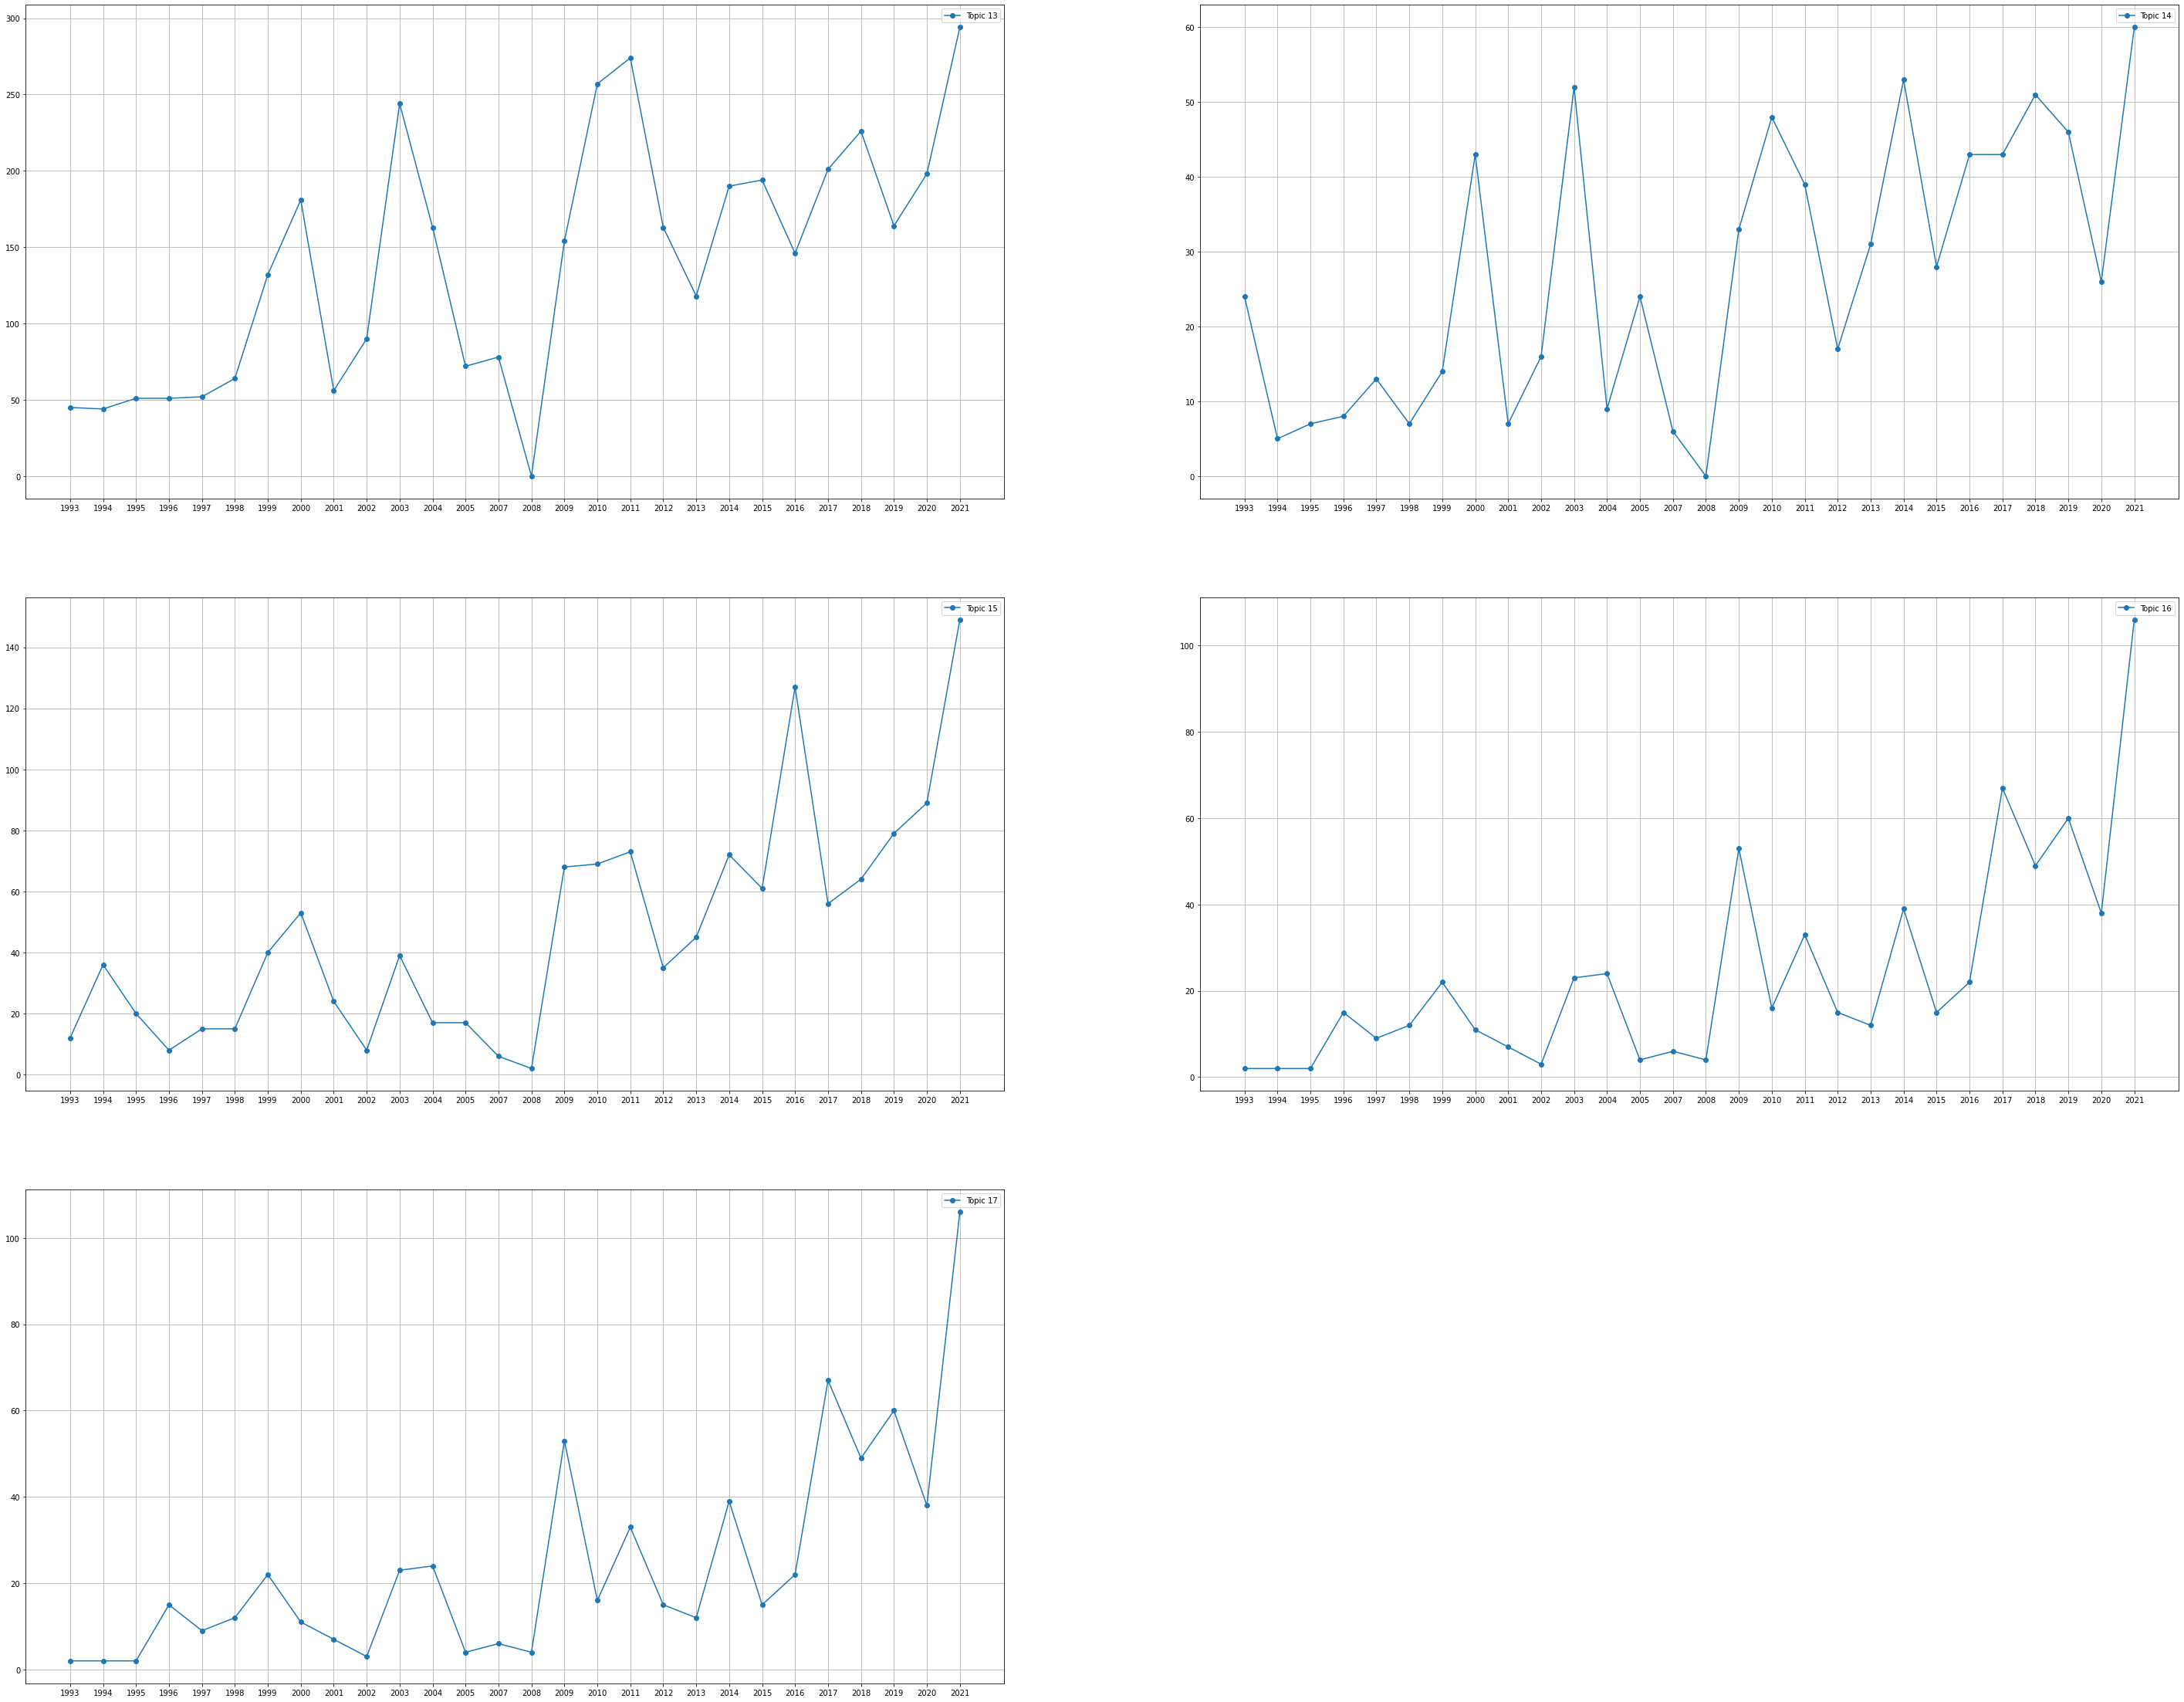

In [ ]:
#plt.figure(figsize=(50, 40))

plt.subplot(321)
plt.plot(nouns2_x, nouns2_topic_7, 'o-', label='Topic 13')
plt.grid()
plt.legend()

plt.subplot(322)
plt.plot(nouns2_x, nouns2_topic_8, 'o-', label='Topic 14')
plt.grid()
plt.legend()

plt.subplot(323)
plt.plot(nouns2_x, nouns2_topic_9, 'o-', label='Topic 15')
plt.grid()
plt.legend()

plt.subplot(324)
plt.plot(nouns2_x, nouns2_topic_10, 'o-', label='Topic 16')
plt.grid()
plt.legend()

plt.subplot(325)
plt.plot(nouns2_x, nouns2_topic_10, 'o-', label='Topic 17')
plt.grid()
plt.legend()

plt.savefig('220223_영문초록_토픽별_시계열_13-17')

plt.show()

#word2vec 임베딩

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

In [ ]:
nouns2_word2vec = Word2Vec(nouns2, min_count=1)
nouns2_word2vec

In [ ]:
nouns2_word2vec.wv.most_similar("program")

[('interaction', 0.9998307824134827),
 ('disorder', 0.9998073577880859),
 ('psychomotor', 0.9997909069061279),
 ('intervention', 0.9997619390487671),
 ('boy', 0.9997586011886597),
 ('adolescent', 0.9997580647468567),
 ('child', 0.9997512102127075),
 ('development', 0.9997380971908569),
 ('improvement', 0.9997048377990723),
 ('integration', 0.9997028708457947)]

In [ ]:
nouns2_tsne = TSNE(n_components=2)
nouns2_tsne

TSNE()

In [ ]:
nouns2_vocab = nouns2_word2vec.wv.vocab
nouns2_similarity = nouns2_word2vec[nouns2_vocab]
nouns2_similarity

array([[-0.03568152, -0.54383373, -0.296835  , ..., -0.22453938,
         0.20594752,  0.0637111 ],
       [-0.10320398, -1.0884176 , -0.6125812 , ..., -0.4296836 ,
         0.40801924,  0.1215501 ],
       [-0.01690297, -0.25441894, -0.12873048, ..., -0.11003619,
         0.09691033,  0.02457859],
       ...,
       [-0.00474082, -0.02602495, -0.00913199, ..., -0.01456374,
         0.00694466,  0.00205156],
       [-0.0026653 , -0.0267968 , -0.01847975, ..., -0.01201905,
         0.0103386 ,  0.00472639],
       [-0.00372732, -0.02771933, -0.0111779 , ..., -0.01212986,
         0.01454289,  0.00262835]], dtype=float32)

In [ ]:
nouns2_transform_similarity = nouns2_tsne.fit_transform(nouns2_similarity)
nouns2_df = pd.DataFrame(nouns2_transform_similarity, index=nouns2_vocab, columns=['x', 'y'])
nouns2_df[0:10]

x          y
limitation      39.226864  31.349777
difference      14.695339  55.648079
legislation    -15.232013 -20.675219
activity        16.240461  50.944775
necessity      -16.859571 -20.329853
legislating     -8.005992  59.352032
direction       31.541031  36.295200
support         20.620714  44.850323
sport           14.649862  52.688751
characteristic  19.923519  48.196968

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc
# 한글 설정
#font_path="./font/NanumBarunGothic.ttf"
#font_name = fm.FontProperties(fname=font_path).get_name()
#rc('font', family=font_name)

(-58.870263481140135, 68.58833827972413, -64.80261154174805, 71.77102584838867)

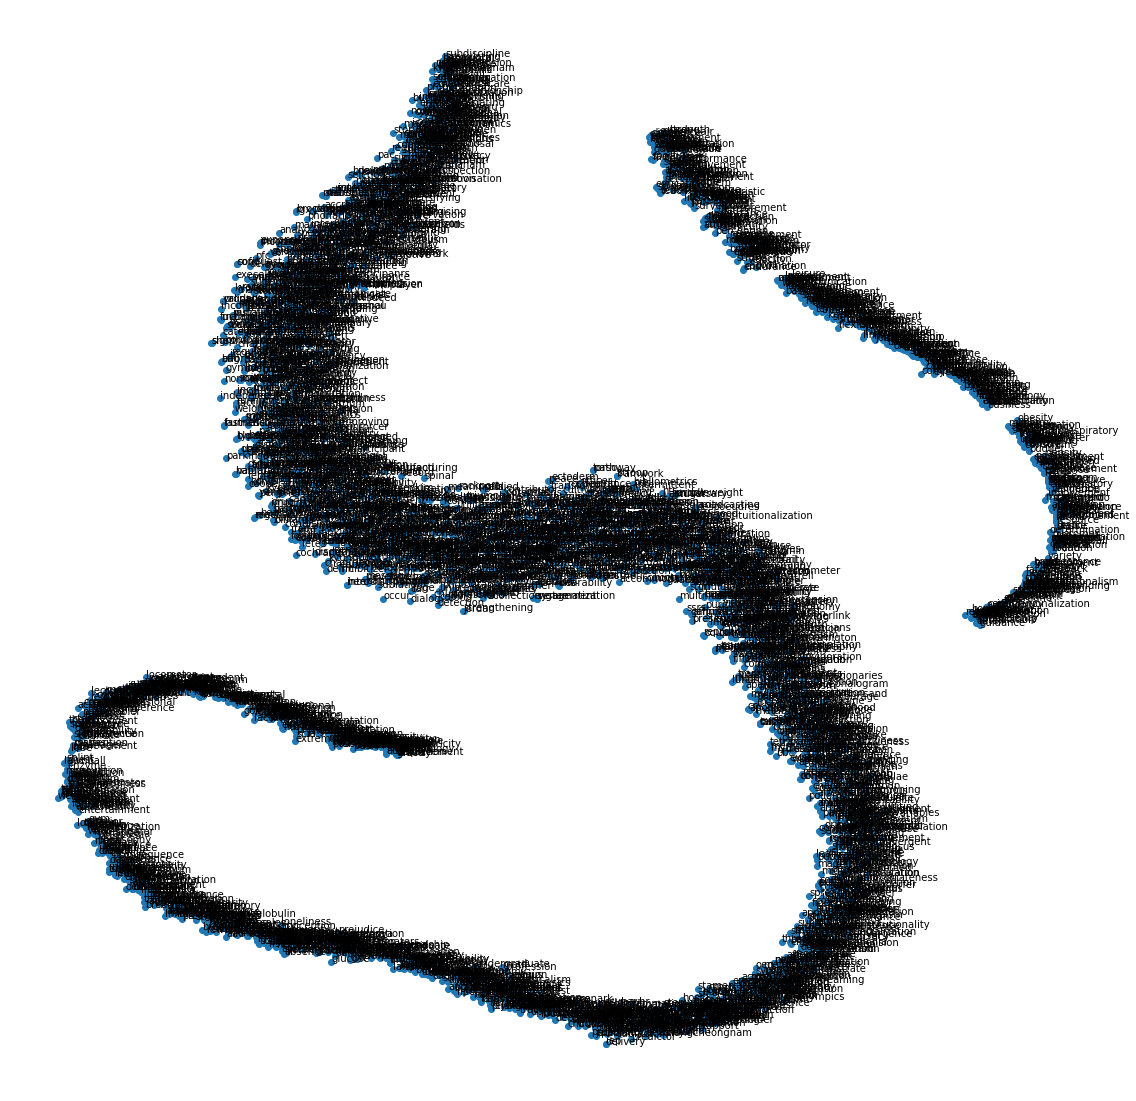

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(20, 20)

ax = fig.add_subplot(1, 1, 1)
ax.scatter(nouns2_df['x'], nouns2_df['y'])
for word, pos in nouns2_df.iterrows():
    ax.annotate(word, pos)
ax.axis("off")